<a href="https://colab.research.google.com/github/Andhi1710/python/blob/main/Kelompok_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Descriptive
1. Jenis apa saja yang ditawarkan oleh prudensial dan jenis asuransi apa yang paling banyak digunakan
2. Dikisaran umur berapa pengguna asuransi di prudensial




In [47]:
#@title Jika Import file dari Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
#@title Kelompok 1 (Prudential)
nama_kelompok = ("Andhi","Deka","Dimas","Ditha","Dwi")
print(nama_kelompok)

('Andhi', 'Deka', 'Dimas', 'Ditha', 'Dwi')


# Data Import

In [1]:
  #memasukkan data 
#jika dari colab langsung hapus path sampai colab notebook 
import pandas as pd
import numpy as np
path = ("/content/drive/My Drive/Colab Notebooks/train.csv")
df = pd.read_csv(path)


In [2]:
#melihat statistik deskriptif
df.describe(include='all')

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59362.000000,59381.000000,59381.000000,52602.000000,59381.000000,48527.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,33985.000000,59381.000000,59381.000000,59381.000000,59381.000000,30725.000000,25140.000000,40197.000000,17570.000000,50492.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
unique,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,14321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39507.211515,1.026355,NaN,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,0.077582,8.641821,1.300904,0.006283,2.142958,0.361469,1.209326,2.007427,5.835840,2.883666,1.027180,1.409188,1.038531,1.727606,1.055792,2.146983,1.958707,0.001733,1.901989,2.048484,2.419360,2.686230,0.474550,0.497737,0.444890,0.484635,7.962172,253.987100,...,0.036459,0.058015,0.010003,0.005962,0.007848,0.190465,0.012715,0.009161,0.007494,0.009296,0.008134,0.014601,0.037167,0.097775,0.018895,0.089456,0.013439,0.011856,0.014937,0.011755,0.025042,0.010896,0.021168,0.022836,0.020646,0.006938,0.010407,0.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


In [4]:
feature_numerik = [col for col in df.columns if df[col].dtype!='object'] 
feature_kategorik = [col for col in df.columns if df[col].dtype=='object']
print('feature numerik antara lain : ', feature_numerik)
print()
print('feature kategorik antara lain : ', feature_kategorik)

feature numerik antara lain :  ['Id', 'Product_Info_1', 'Product_Info_3', 'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_2', 'Employment_Info_3', 'Employment_Info_4', 'Employment_Info_5', 'Employment_Info_6', 'InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_3', 'InsuredInfo_4', 'InsuredInfo_5', 'InsuredInfo_6', 'InsuredInfo_7', 'Insurance_History_1', 'Insurance_History_2', 'Insurance_History_3', 'Insurance_History_4', 'Insurance_History_5', 'Insurance_History_7', 'Insurance_History_8', 'Insurance_History_9', 'Family_Hist_1', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5', 'Medical_History_1', 'Medical_History_2', 'Medical_History_3', 'Medical_History_4', 'Medical_History_5', 'Medical_History_6', 'Medical_History_7', 'Medical_History_8', 'Medical_History_9', 'Medical_History_10', 'Medical_History_11', 'Medical_History_12', 'Medical_History_13', 'Medical_History_14', 'Medical_Hi

# Data Preparation

In [5]:
#@title Dealing with missing values
missing_data = df.isnull()
missing_data.head(10)

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,Fals

In [6]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Id
False    59381
Name: Id, dtype: int64

Product_Info_1
False    59381
Name: Product_Info_1, dtype: int64

Product_Info_2
False    59381
Name: Product_Info_2, dtype: int64

Product_Info_3
False    59381
Name: Product_Info_3, dtype: int64

Product_Info_4
False    59381
Name: Product_Info_4, dtype: int64

Product_Info_5
False    59381
Name: Product_Info_5, dtype: int64

Product_Info_6
False    59381
Name: Product_Info_6, dtype: int64

Product_Info_7
False    59381
Name: Product_Info_7, dtype: int64

Ins_Age
False    59381
Name: Ins_Age, dtype: int64

Ht
False    59381
Name: Ht, dtype: int64

Wt
False    59381
Name: Wt, dtype: int64

BMI
False    59381
Name: BMI, dtype: int64

Employment_Info_1
False    59362
True        19
Name: Employment_Info_1, dtype: int64

Employment_Info_2
False    59381
Name: Employment_Info_2, dtype: int64

Employment_Info_3
False    59381
Name: Employment_Info_3, dtype: int64

Employment_Info_4
False    52602
True      6779
Name: Employment_Info_4, dtype: int64

In [7]:
df= pd.read_csv(path,nrows=10)
df.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.0,10.000000,9.000000,10.000000,10.0,10.000000,10.000000,10.0,10.000000,10.0,10.000000,10.0,10.000000,10.000000,7.000000,10.000000,10.000000,10.000000,10.000000,6.000000,4.000000,7.000000,3.000000,8.00000,10.000000,10.000000,...,10.0,10.0,10.0,10.0,10.0,10.000000,10.0,10.0,10.0,10.0,10.000000,10.0,10.000000,10.0,10.0,10.000000,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,10.0,10.000000,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000
mean,9.400000,1.0,20.700000,0.173030,2.100000,2.600000,1.0,0.388060,0.667273,0.235356,0.406408,0.087200,7.800000,1.600000,0.0,2.400000,0.459089,1.200000,2.0,5.700000,2.900000,1.0,1.600000,1.0,1.600000,1.0,2.400000,1.900000,0.002345,1.600000,1.900000,2.300000,2.500000,0.461353,0.477941,0.400402,0.571429,5.00000,245.300000,2.100000,...,0.0,0.0,0.0,0.0,0.0,0.100000,0.0,0.0,0.0,0.0,0.100000,0.0,0.100000,0.0,0.0,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0.0,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.200000
std,4.623611,0.0,7.543209,0.131200,0.316228,0.843274,0.0,0.226354,0.090727,0.083875,0.101866,0.098946,5.072803,0.966092,0.0,0.516398,0.472895,0.421637,0.0,2.057507,0.316228,0.0,0.516398,0.0,0.516398,0.0,0.966092,0.875595,0.002846,0.966092,0.875595,0.483046,0.527046,0.215044,0.130402,0.200979,0.055759,2.77746,204.918981,0.316228,...,0.0,0.0,0.0,0.0,0.0,0.316228,0.0,0.0,0.0,0.0,0.316228,0.0,0.316228,0.0,0.0,0.316228,0.0,0.0,0.0,0.0,0.0,0.0,0.316228,0.0,0.316228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.011091
min,2.000000,1.0,10.000000,0.076923,2.000000,1.000000,1.0,0.029851,0.581818,0.131799,0.272288,0.000000,1.000000,1.000000,0.0,2.000000,0.001800,1.000000,2.0,3.000000,2.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.000133,1.000000,1.000000,2.000000,2.000000,0.188406,0.294118,0.084507,0.526786,0.00000,3.000000,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
25%,6.250000,1.0,12.750000,0.076923,2.000000,3.000000,1.0,0.216418,0.600000,0.176255,0.354989,0.027250,3.000000,1.000000,0.0,2.000000,0.050000,1.000000,2.0,3.750000,3.000000,1.0,1.000000,1.0,1.000000,1.0,1.500000,1.000000,0.000667,1.000000,1.000000,2.000000,2.000000,0.333333,0.441176,0.288732,0.540179,4.00000,120.250000,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0

In [8]:
headers = ["Product_Info_3","Ins_Age","BMI","Family_Hist_2","Response"]
df = pd.read_csv(path, names = headers)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
kolum = ["Product_Info_3","Ins_Age","BMI","Family_Hist_2","Response"]
df= pd.read_csv(path, usecols=kolum)


In [10]:
df.describe()

,Product_Info_3,Ins_Age,BMI,Family_Hist_2,Response
count,59381.000000,59381.000000,59381.000000,30725.000000,59381.000000
mean,24.415655,0.405567,0.469462,0.474550,5.636837
std,5.072885,0.197190,0.122213,0.154959,2.456833
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,26.000000,0.238806,0.385517,0.362319,4.000000
50%,26.000000,0.402985,0.451349,0.463768,6.000000
75%,26.000000,0.567164,0.532858,0.579710,8.000000
max,38.000000,1.000000,1.000000,1.000000,8.000000


In [11]:
df.dtypes

Product_Info_3      int64
Ins_Age           float64
BMI               float64
Family_Hist_2     float64
Response            int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product_Info_3  59381 non-null  int64  
 1   Ins_Age         59381 non-null  float64
 2   BMI             59381 non-null  float64
 3   Family_Hist_2   30725 non-null  float64
 4   Response        59381 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 2.3 MB


In [13]:
df.replace("?", np.nan, inplace = True)
df.head(10)

,Product_Info_3,Ins_Age,BMI,Family_Hist_2,Response
0,10,0.641791,0.323008,NaN,8
1,26,0.059701,0.272288,0.188406,4
2,26,0.029851,0.428780,0.304348,8
3,10,0.164179,0.352438,0.420290,8
4,26,0.417910,0.424046,0.463768,8
5,26,0.507463,0.364887,NaN,8
6,10,0.373134,0.376587,0.594203,8
7,26,0.611940,0.571612,NaN,1
8,26,0.522388,0.362643,NaN,8
9,21,0.552239,0.587796,0.797101,1


In [14]:
missing_data = df.isnull()
missing_data.head(10)

,Product_Info_3,Ins_Age,BMI,Family_Hist_2,Response
0,False,False,False,True,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,True,False
6,False,False,False,False,False
7,False,False,False,True,False
8,False,False,False,True,False
9,False,False,False,False,False


In [15]:
#@title Drop Missing Values
df.dropna(subset=["Family_Hist_2"], axis=0, inplace= True)

In [16]:
avg_norm_loss = df["Family_Hist_2"].astype("float").mean(axis=0)
print("Average of Family_Hist_2:", avg_norm_loss)

Average of Family_Hist_2: 0.4745500642717966


In [17]:
#@title Replace the Missing Values
df["Family_Hist_2"].replace(np.nan, avg_norm_loss, inplace=True)

In [18]:
#@title Correcting Data Types
df["Family_Hist_2"].tail()

59373    0.275362
59374    0.405797
59376    0.217391
59377    0.565217
59378    0.173913
Name: Family_Hist_2, dtype: float64

In [36]:
#@title Data Normalisasi
df["Response"] = df["Response"].astype("float")

In [37]:
df["Response"] = df["Response"]/df["Response"].max()

In [38]:
responsex = df[['Response']]
responsex.describe()

,Response
count,3.072500e+04
mean,-1.363919e-13
std,1.175938e+00
min,-2.590028e+00
25%,-5.385835e-01
50%,4.871388e-01
75%,1.000000e+00
max,1.000000e+00


In [39]:
df["Product_Info_3"] = df["Product_Info_3"].astype("float")

In [40]:
df["Product_Info_3"] = df["Product_Info_3"]/df["Product_Info_3"].max()

In [41]:
responsex = df[['Product_Info_3']]
responsex.describe()

,Product_Info_3
count,3.072500e+04
mean,1.207860e-14
std,3.810152e-01
min,-1.647845e+00
25%,1.173851e-01
50%,1.173851e-01
75%,1.173851e-01
max,1.000000e+00


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30725 entries, 1 to 59378
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product_Info_3  30725 non-null  float64
 1   Ins_Age         30725 non-null  float64
 2   BMI             30725 non-null  float64
 3   Family_Hist_2   30725 non-null  float64
 4   Response        30725 non-null  float64
dtypes: float64(5)
memory usage: 1.4 MB


In [43]:
df["Response"] = (df["Response"]-df["Response"].min())/(df["Response"].max()-df["Response"].min())

In [44]:
responsex = df[['Response']]
responsex.describe()

,Response
count,30725.000000
mean,0.721451
std,0.327557
min,0.000000
25%,0.571429
50%,0.857143
75%,1.000000
max,1.000000


In [45]:
df["Product_Info_3"] = (df["Product_Info_3"]-df["Product_Info_3"].min())/(df["Product_Info_3"].max()-df["Product_Info_3"].min())

In [46]:
responsex = df[['Product_Info_3']]
responsex.describe()

,Product_Info_3
count,30725.000000
mean,0.622334
std,0.143896
min,0.000000
25%,0.666667
50%,0.666667
75%,0.666667
max,1.000000


In [47]:
df["Response"] = (df["Response"]-df["Response"].mean())/df["Response"].std()

In [48]:
responsex = df[['Response']]
responsex.describe()

,Response
count,3.072500e+04
mean,-1.158430e-13
std,1.000000e+00
min,-2.202521e+00
25%,-4.580033e-01
50%,4.142555e-01
75%,8.503849e-01
max,8.503849e-01


In [49]:
df["Product_Info_3"] = (df["Product_Info_3"]-df["Product_Info_3"].mean())/df["Product_Info_3"].std()

In [50]:
responsex = df[['Product_Info_3']]
responsex.describe()

,Product_Info_3
count,3.072500e+04
mean,3.163462e-14
std,1.000000e+00
min,-4.324879e+00
25%,3.080852e-01
50%,3.080852e-01
75%,3.080852e-01
max,2.624567e+00


In [51]:
df.describe()

,Product_Info_3,Ins_Age,BMI,Family_Hist_2,Response
count,3.072500e+04,30725.000000,30725.000000,30725.000000,3.072500e+04
mean,3.163462e-14,0.297626,0.455770,0.474550,-1.158430e-13
std,1.000000e+00,0.155471,0.121132,0.154959,1.000000e+00
min,-4.324879e+00,0.000000,0.000000,0.000000,-2.202521e+00
25%,3.080852e-01,0.179104,0.372161,0.362319,-4.580033e-01
50%,3.080852e-01,0.283582,0.440058,0.463768,4.142555e-01
75%,3.080852e-01,0.402985,0.517174,0.579710,8.503849e-01
max,2.624567e+00,0.820896,1.000000,1.000000,8.503849e-01


In [ ]:
#@title Binning
bins = np.linspace(min(df["Response"]), max(df["Response"]), 4)
bins

array([-2.20252086, -1.18488561, -0.16725036,  0.85038489])

In [ ]:
group_names = ['Low', 'Medium', 'High']

In [ ]:
df['Response-binned'] = pd.cut(df['Response'], bins, labels=group_names, include_lowest=True )
df[['Response','Response-binned']].head(20)

,Response,Response-binned
1,-0.894133,Medium
2,0.850385,High
3,0.850385,High
4,0.850385,High
6,0.850385,High
9,-2.202521,Low
11,-1.766391,Low
13,-1.330262,Low
16,0.850385,High
19,0.850385,High


# Correlation

(0.0, 0.867571523410924)

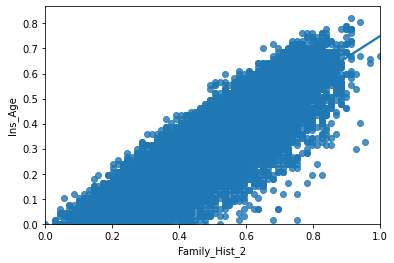

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x="Family_Hist_2", y="Ins_Age", data=df)
plt.ylim(0,)

# Data Visualisation

Text(0.5, 1.0, 'Response bins')

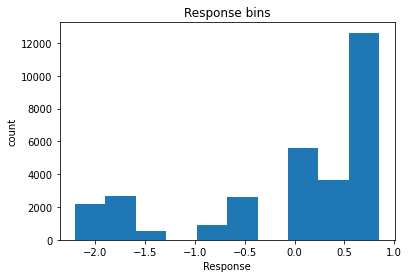

In [52]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["Response"])

# set x/y labels and plot title
plt.pyplot.xlabel("Response")
plt.pyplot.ylabel("count")
plt.pyplot.title("Response bins")

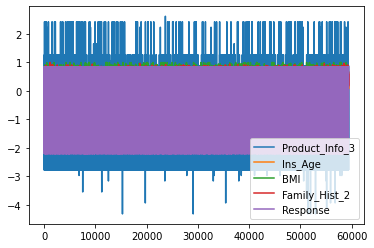

In [53]:
df.plot(kind="line")

In [54]:
df.head()

,Product_Info_3,Ins_Age,BMI,Family_Hist_2,Response
1,0.308085,0.059701,0.272288,0.188406,-0.894133
2,0.308085,0.029851,0.428780,0.304348,0.850385
3,-2.780557,0.164179,0.352438,0.420290,0.850385
4,0.308085,0.417910,0.424046,0.463768,0.850385
6,-2.780557,0.373134,0.376587,0.594203,0.850385


In [58]:
df["Response"].value_counts()

 0.850385    12625
-0.021874     5605
 0.414255     3673
-1.766391     2661
-0.458003     2592
-2.202521     2158
-0.894133      877
-1.330262      534
Name: Response, dtype: int64

Text(0.5, 1.0, 'Response bins')

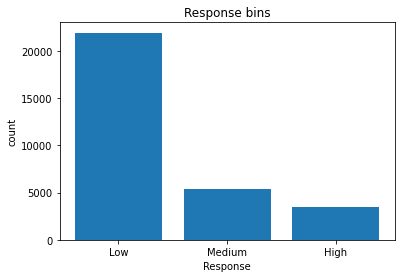

In [59]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["Response-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Response")
plt.pyplot.ylabel("count")
plt.pyplot.title("Response bins")

Text(0.5, 1.0, 'Response bins')

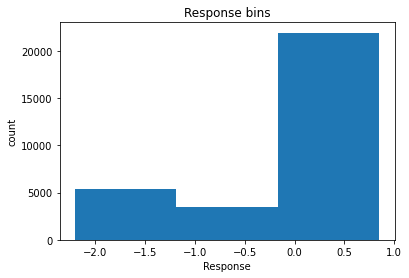

In [60]:
#@title Histogram
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["Response"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("Response")
plt.pyplot.ylabel("count")
plt.pyplot.title("Response bins")

In [61]:
df.columns

Index(['Product_Info_3', 'Ins_Age', 'BMI', 'Family_Hist_2', 'Response',
       'Response-binned'],
      dtype='object')

In [62]:
df.isnull().sum()

Product_Info_3     0
Ins_Age            0
BMI                0
Family_Hist_2      0
Response           0
Response-binned    0
dtype: int64

# Specialized Visualization Tools

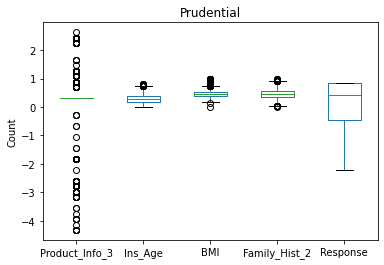

In [63]:
#@title Box Plots
import matplotlib.pyplot as plt
df.plot(kind='box')
plt.ylabel("Count")
plt.title("Prudential")
plt.show()